***
#            🐼 The killer Panda's Capstone Project 🐼

***

*In this notebok you can find all our work, how we manipulate all data and how we made the data analysis and their statistics*

![first.gif](https://media.giphy.com/media/vaRCdgM0fLNrW/giphy.gif)

***
## Business Understanding
***

![first.gif](https://media.giphy.com/media/xT5LMWNOjGqJzUfyve/giphy.gif)

*Our team is currently tasked with generating valuable insights as computer vision ventures into the film industry:*

* The movies who have the higher earnings and its categories
* The best categories to develop a movie in
* The most likely successful directors within these categories to make a successful movie
* Find out if the duration of a movie has an influence in the earnings and engagement

***
## Data Understanding and Analysis
***

![gif2](https://media.giphy.com/media/AXorq76Tg3Vte/giphy.gif)

The data that we used is from pages about movies such as the moviedb.org and rotten tomatoes. We used them due to their records where we got info such as movie ratings, genres, directors, etc. We used data sets with more than 140,000 entries and using statistical measures such as mean or standard deviation to understand the behavior of data The conclusions and graphs we’re getting from the information of the datasets, such as the graph of the most popular genres in movies using columns from im.db dataset. We had to adjust our analysis due to limitations with some datasets that weren´t up to date and other ones had missing data Description of data

***
#  💸💲Budget/Gross/Profit 💸💲
***

![gif3](https://media.giphy.com/media/3oEdvbpl0X32bXD2Vi/giphy.gif)

Computer vision wants to make projects with big earning and that’s why we started studying the movies with highest earnings, if we identified them, we could find common points such as genres, directors, and another interesting data. We started with dataset `tn.movie_budget.csv` we cleaned to converting the data in integers, then we get the values `Earnings` subtracting values `Budget` from values `Gross`. We ordered the data in descent way, and we get the first 10 movies to graph.

First we load all the libraries:

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn 
import numpy as np
from scipy import stats
import math

The first dataset we work was the from `tn.movie_budgets.csv`, let's import all the libraries we will need

In [2]:
tn_budgets = pd.read_csv('data/tn.movie_budgets.csv', index_col=0)

#We can make a checkout of the dataset, know their columns and kind of values
#Also is useful if we check the information of our dataset
#If think you may need see this information, plese uncomment the code below

#tn_budgets.info()
#tn_budgets.head(10)

We can see we do not have missing values, all the type of data is object and we have four columns.
As you can see, `production_budget`, `domestic_gross`, `worldwide_gross` are columns for money so we need them in type int, let's make a cleaning delenting the `$ and ,`

In [3]:
'''
We made this funtion to clear all the columns just calling it, in order to reuse it 
we also set as argument a list call columns, if we had another data ser we couls call
the funtion and specify the columns we want to transform
'''
def cleaning(columns):
    for x in columns:
        # This part clean the symbols $ and , by replacing them with "nothing"
        tn_budgets[x]=tn_budgets[x].apply(lambda x: x.replace(",","").replace("$",""))
        # ecause of the type of this rows and columns and in order we 
        # want to make some calculation it is needed to transform them to numeric
        tn_budgets[x]=pd.to_numeric(tn_budgets[x])

#The columns we want to clean are save them in a list
columns =  ['production_budget', 'domestic_gross','worldwide_gross']

#Call the funtion, and now all the columns are in good formart! :D
cleaning(columns)

#Now we want to add a column call "earnings"
tn_budgets["earnings"]=tn_budgets["worldwide_gross"]-tn_budgets["production_budget"]

#As well as a column called "Profit"
tn_budgets["Profit"]=(tn_budgets["earnings"]/tn_budgets["worldwide_gross"])*100


### Ploting with seaborn

We have the new columns and the cleaning have been applied to all the data, but for a preview we only want to see the top ten movie sorted with more earnings

#### Earning

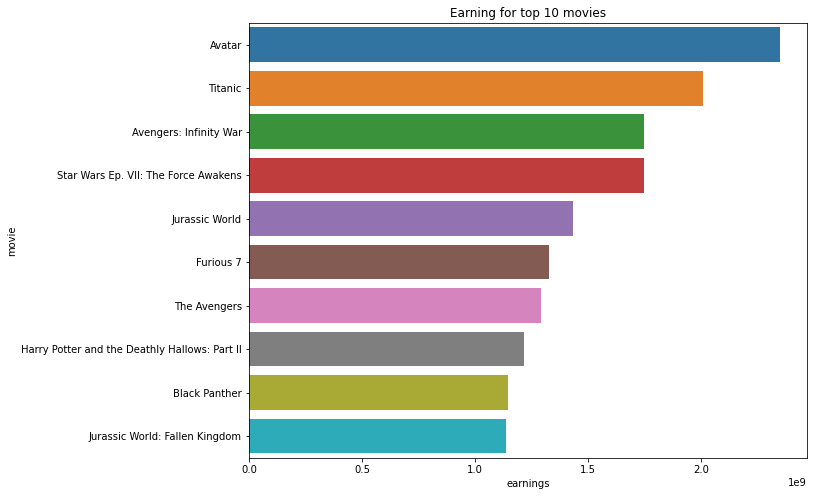

In [4]:
# Making a copy with the first 10 movies, you can use more than only 10 elemnts :D
tp1=tn_budgets.sort_values(by="earnings", ascending=False).head(10).copy()

#Making a new dataframe with only the required columns
topten1 = tp1.loc[:,["movie", "earnings"]]

fig= plt.subplots(figsize=(10, 8))

##We decide to use seaborn and the bar kind
seaborn.barplot(x ="earnings", y ="movie", data = topten1)
plt.title("Earning for top 10 movies")
plt.show()

#### Profit

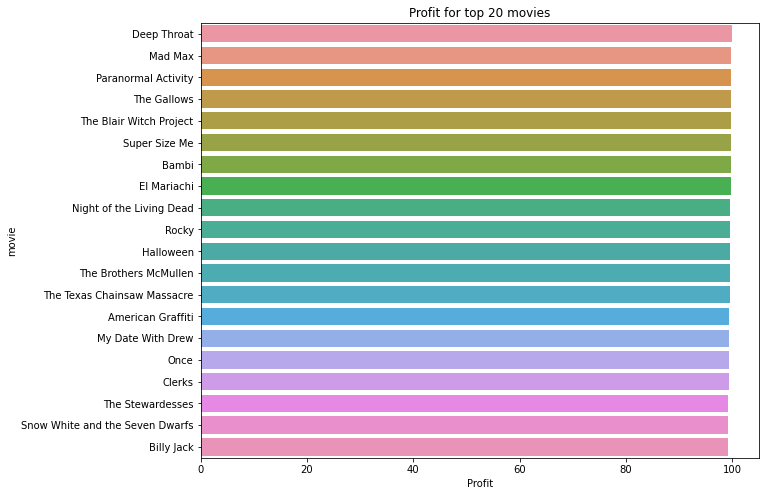

In [5]:
#We also want to see how it sees ploting the profit vs the movie
tptw=tn_budgets.sort_values(by="Profit", ascending=False).head(20).copy()

#Repeat the process for new columns
toptw = tptw.loc[:,["movie", "Profit"]]


fig= plt.subplots(figsize=(10, 8))
seaborn.barplot(x ="Profit", y ="movie", data = toptw)
plt.title("Profit for top 20 movies")
plt.show()

#### Earning and budget

Exploring other options for the plotting. The movie's name are large, let's try to use an ID, crating a list with the IDs.

* How to use the method stack and how it works for seaborn by <a href="https://stackoverflow.com/users/1494637/stefan">Stefan</a> 
on <a href="https://stackoverflow.com/questions/37174715/using-seaborn-barplot-to-plot-wide-form-dataframes">Stack**overflow**</a>

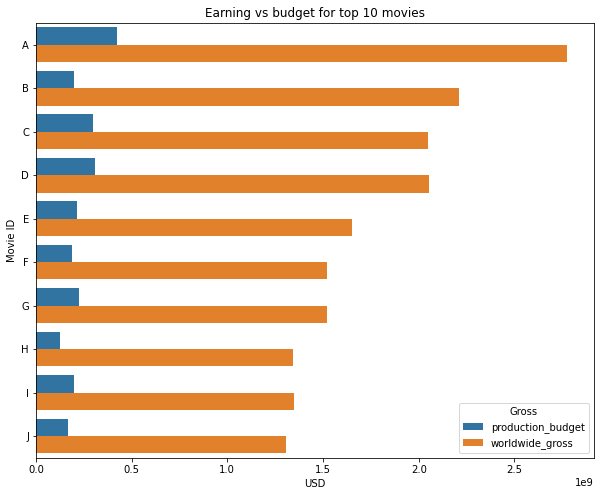

In [6]:
MovieID = ["A","B","C","D","E","F","G","H","I","J"]
tp2 = tp1

#adding the IDs to the dataframe
tp2["Movie ID"]= MovieID
topten2 = tp2.loc[:,["Movie ID","production_budget", "worldwide_gross"]]

#For this plot we want to plot two values for each movie, so in order to do that we need the "hue" expression
#In this expression the two values join 

#First let's set the ID columns as the index
topten2 = topten2.set_index("Movie ID")

#In order to use "hue" we need to chage the structure of the datafram with .stack()
stopten = topten2.stack().reset_index()

#Settin the columns to the new structured dataframe
stopten.columns = ['Movie ID', 'Gross', 'USD']

fig= plt.subplots(figsize=(10, 8))
seaborn.barplot(y ="Movie ID", x="USD", hue="Gross", data = stopten)
plt.title("Earning vs budget for top 10 movies")
plt.show()

#### Genres of the movies

For the plot above we have the graph but we do not know what is A or B, etc, let's make a new DataFarame which include the name of the movie as well as the director and their categorie, this information was gathered from the `im.db`

Then we got a data frame of the top ten movies with highest earnings and added the genres of each movie, in this way we could find more useful information about those genres.

In [7]:
# DataFrame to explain what is A, B, C etc
#First a list with the genres and then the list for directors
genres_tp=["Action, Adventure, Sci-fi, Fantasy", 
           "Drama",  "Action, Sci-fi",
           "Action, Sci-fi-, Adventure, Fantasy", 
           "Action, Sci-fi-, Thriller, Adventure",
           "Action, Adventure", 
           "Action, Fantasy, Adventure, Sci-fi", 
           "Adventure, Fantasy, Mystery, Drama",
           "Action, Fantasy, Adventure, Sci-fi", 
           "Action, Adventure, Sci-Fi"]

director_tp=["James Cameron", "James Cameron", 
             "Anthony Russo, Joe Russo", 
             "J.J. Abrams", "Colin Trevorrow",
             "James Wan", "Joss Whedon", "David Yates", 
             "Ryan Coogler", "J.A. Bayona"]

#Gather the movie's name list from the previos Df
title = list(tp2["movie"])

#Creating the new Df using .zip()
ID_df=pd.DataFrame(zip(MovieID,title,genres_tp, director_tp), 
                   columns = ["MovieID", "Title", "Genre", "Director"])
ID_df.set_index("MovieID")

,Title,Genre,Director
MovieID,,,
A,Avatar,"Action, Adventure, Sci-fi, Fantasy",James Cameron
B,Titanic,Drama,James Cameron
C,Avengers: Infinity War,"Action, Sci-fi","Anthony Russo, Joe Russo"
D,Star Wars Ep. VII: The Force Awakens,"Action, Sci-fi-, Adventure, Fantasy",J.J. Abrams
E,Jurassic World,"Action, Sci-fi-, Thriller, Adventure",Colin Trevorrow
F,Furious 7,"Action, Adventure",James Wan
G,The Avengers,"Action, Fantasy, Adventure, Sci-fi",Joss Whedon
H,Harry Potter and the Deathly Hallows: Part II,"Adventure, Fantasy, Mystery, Drama",David Yates
I,Black Panther,"Action, Fantasy, Adventure, Sci-fi",Ryan Coogler


Now a new table for only the MovieID and the Genre

In [8]:
AB_df=pd.DataFrame(zip(MovieID,genres_tp), columns = ["MovieID", "Genre"])
AB_df.set_index("MovieID")

,Genre
MovieID,
A,"Action, Adventure, Sci-fi, Fantasy"
B,Drama
C,"Action, Sci-fi"
D,"Action, Sci-fi-, Adventure, Fantasy"
E,"Action, Sci-fi-, Thriller, Adventure"
F,"Action, Adventure"
G,"Action, Fantasy, Adventure, Sci-fi"
H,"Adventure, Fantasy, Mystery, Drama"
I,"Action, Fantasy, Adventure, Sci-fi"


### Plotting whit matplotlib

We also want to see how it sees the plot in matplotlib

Text(0.5, 1.0, 'Budget for each movie')

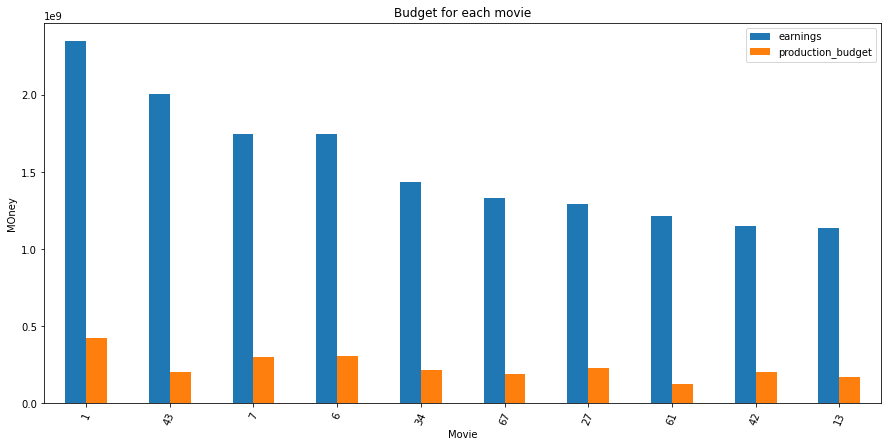

In [9]:
topten = tp1.loc[:,["movie", "earnings", "production_budget"]]
topten.plot.bar(figsize=(15,7))
plt.xticks(rotation=67)
plt.xlabel('Movie')
plt.ylabel('MOney')
plt.title('Budget for each movie')

***
#  🎥🎞 Data Analysis of Categories 🎞 🎥
***

![gifm](https://media.giphy.com/media/XZ0lh4zVU9fOuBAZK5/giphy.gif)

***
## Why is this data relevant?
***
* Is important because depends in how much rating and number of votes you can see wich category is more succesful
* With this we can assume wich category is most relevant on these days

*Here we can see the average rating of the category with the highest number of votes.
The main reason to filter this way is to show that not always the best rated categories are the one who have more votes*

In [10]:
#Doing the connection
conn = sqlite3.connect('data/im.db')

In [11]:
pd.read_sql("""
SELECT 
    mb.genres AS Category,
    mr.averagerating AS Rating,
    mr.numvotes as NumberVotes
FROM 
    movie_basics mb
INNER JOIN 
    movie_ratings mr
ON 
    mb.movie_id = mr.movie_id
WHERE 
    mr.numvotes >= 900000 
AND 
    mr.averagerating >= 8.1
GROUP BY 
    mb.genres 
ORDER BY Rating  DESC  
;""", conn)

,Category,Rating,NumberVotes
0,"Adventure,Drama,Sci-Fi",8.6,1299334
1,"Drama,Western",8.4,1211405
2,"Action,Thriller",8.4,1387769
3,"Biography,Crime,Drama",8.2,1035358
4,"Mystery,Thriller",8.1,1005960
5,"Action,Adventure,Sci-Fi",8.1,1183655
6,"Action,Adventure,Comedy",8.1,948394


*In the next graphic we can see that the best rating category is not the one that have the most votes.With that in mind we need to hear more to the audience to see what is the best option. Here I prefered to use matplotib only to show you the 3 main values and see the difference between them*

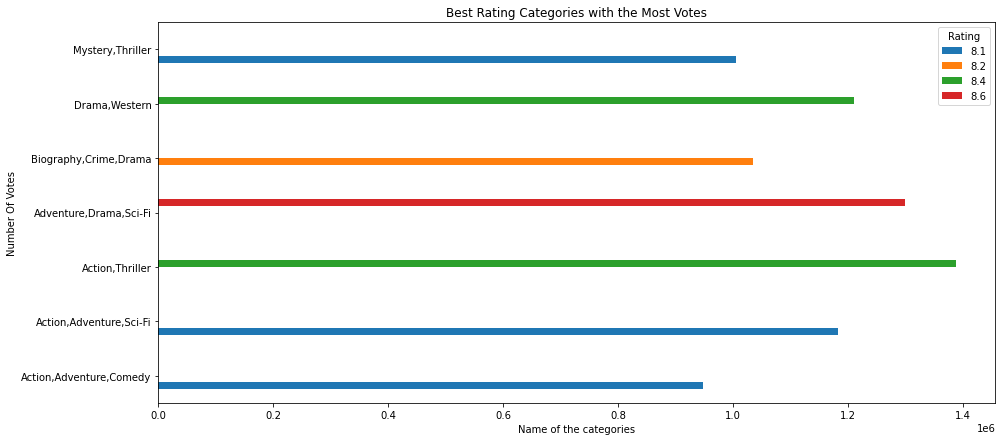

In [12]:
q= """
SELECT 
    mb.genres AS Category,
    mr.averagerating AS Rating,
    mr.numvotes as NumberVotes
FROM 
    movie_basics mb
INNER JOIN 
    movie_ratings mr
ON 
    mb.movie_id = mr.movie_id
WHERE 
    mr.numvotes >= 900000 
AND 
    mr.averagerating >= 8.1
GROUP BY 
    mb.genres 
ORDER BY 
    Rating  DESC
;
"""
df=pd.read_sql(q, conn)
df.pivot(index='Category',columns='Rating',values='NumberVotes').plot(kind='barh',figsize=(15,7))
plt.xlabel('Name of the categories')
plt.ylabel('Number Of Votes')
plt.title('Best Rating Categories with the Most Votes')
plt.show()

*Now that we can see that not always the best rating category have the most votes so with that in mind we will see in the next graphic that only **Action and Thriller are the two with the most votes but they are together**, What if we only want to see the best categories with the most votes? We will see it after that!*

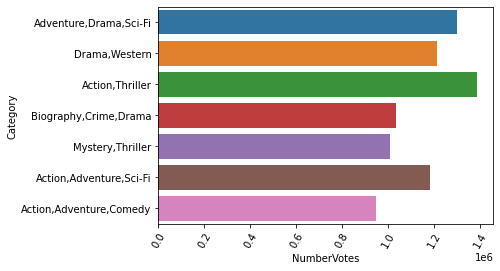

In [13]:
seaborn.barplot(data=df, x="NumberVotes", y="Category")
plt.xticks(rotation=60)
plt.show()

*First we need to filter the data between 900000 votes (the main reason we use this value is because the highest number of votes are 1800000)*

In [14]:
df4=pd.read_sql("""
SELECT 
    mb.genres AS Category,
    mr.averagerating AS Rating
FROM 
    movie_basics mb
INNER JOIN 
    movie_ratings mr
ON 
    mb.movie_id = mr.movie_id
WHERE 
    mr.numvotes >= 900000 AND mr.averagerating >= 8.1
""", conn)
df4

,Category,Rating
0,"Mystery,Thriller",8.1
1,"Action,Thriller",8.4
2,"Adventure,Drama,Sci-Fi",8.6
3,"Action,Adventure,Comedy",8.1
4,"Drama,Western",8.4
5,"Biography,Crime,Drama",8.2
6,"Action,Adventure,Sci-Fi",8.1
7,"Action,Adventure,Sci-Fi",8.8


*Then we are going to make the split of the values just to count the most voted ones!*

In [15]:
#We separete the values with the methon split by the commas
categories_cols = df4['Category'].str.split(',',expand=True)

#Adding the columns in wich the genre will split
categories_cols.columns = ['genre1','genre2','genre3']

#for each category we need to sum each time the same appear
counts1=categories_cols['genre1'].value_counts()
counts2=categories_cols['genre2'].value_counts()
counts3=categories_cols['genre3'].value_counts()

total_counts = counts1.add(counts2, fill_value=0).add(counts3, fill_value=0)

#Gathering the count in a dataframe and sorting them
one_category = total_counts.sort_values(ascending=False)
one_category.index

#Now we can create the dataframe with the frecuency of each category
dfone=pd.DataFrame(list(zip(one_category.values, one_category.index)), 
                   columns = ["Frequency", "Category"])
dfone.head(5)

,Frequency,Category
0,4.0,Adventure
1,4.0,Action
2,3.0,Sci-Fi
3,3.0,Drama
4,2.0,Thriller


*In the next graphic we will show you the top 5 of the most voted categories!*

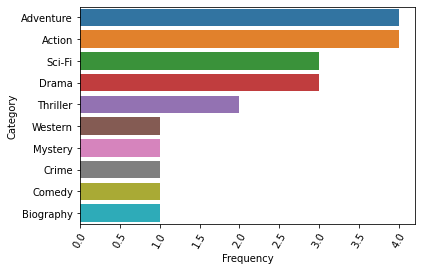

In [16]:
seaborn.barplot(data=dfone, x="Frequency", y="Category")
plt.xticks(rotation=60)
plt.show()

*Our main value is the number of votes because this votes are provided by the community and the rating are provided by movie critics or people that is related with producers and movies.So if you want to be in this trend, you should make with our top 5!*

***
# 🎬👨 Data Analysis Directors 👩🏼🎬
***

![gifmi](https://media.giphy.com/media/26DOMQa5Ib2SmaRZm/giphy.gif)

We filtered the im.db database to only select directors that have a 7 or higher average rating for their body of work and over 400,000 votes on their films then limited the query to the top 20 in order of highest rating. On the next graph you will see that we worked on getting the Categories and film names for those top 20 directors. but the categories are grouped together i.e "action,adventure,drama".

In reference to:
![erd-im](https://github.com/PaolaMalagon/dsc-ai-academy-semester1-capstone/blob/main/movie_data_erd.jpeg?raw=true)

In [17]:
avg_rating = """
SELECT 
    person_id , 
    primary_name as Director , 
    COUNT(DISTINCT directors.movie_id) as "MoviesMade", 
SUM 
    (movie_ratings.averagerating) / 
COUNT
    (movie_ratings.averagerating) as "Average Rating", 
    movie_ratings.numvotes as numvotes 
FROM 
    persons
    JOIN 
        directors 
    USING 
        (person_id)
        JOIN 
            movie_basics
        USING 
            (movie_id)
            JOIN 
                movie_ratings
            USING 
                (movie_id)
GROUP BY 
    person_id 
HAVING 
    "Average Rating" >= 7.0 
AND 
    numvotes >= 400000
ORDER BY 
    "Average Rating" DESC
LIMIT 20
    
;
"""
pd.read_sql(avg_rating, conn)

,person_id,Director,MoviesMade,Average Rating,numvotes
0,nm0000233,Quentin Tarantino,4,8.700000,1211405
1,nm0634240,Christopher Nolan,4,8.437500,1299334
2,nm0881279,Lee Unkrich,2,8.350000,682218
3,nm0751648,Joe Russo,4,8.246667,666252
4,nm0751577,Anthony Russo,4,8.246667,666252
5,nm0215455,Ronnie Del Carmen,1,8.200000,536181
6,nm1783265,Tim Miller,1,8.000000,820847
7,nm0154716,Stephen Chbosky,2,8.000000,422671
8,nm0230032,Pete Docter,2,7.977778,536181
9,nm0213450,Dean DeBlois,3,7.940000,611299


*Here is the graph with the top 20 directors with their average ratings. In the following function we ran a query to see what directors have a overall high average rating about 7 as well as a high number of votes to eliminate high rating but low voting outliers. We organized it into a top 20 by average rating of their movies made in descending order from highest to lowest.*

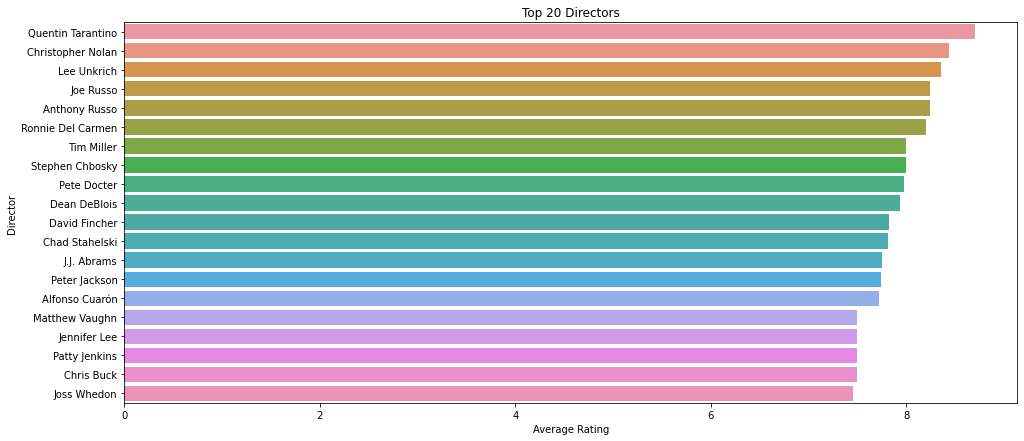

In [18]:
top_20_directors = pd.read_sql(avg_rating , conn) 
fig = plt.subplots(figsize = (16,7))
seaborn.barplot(data=top_20_directors, 
            x="Average Rating" , y= "Director", orient="h")

plt.title("Top 20 Directors")

plt.show()

***
# Query for top 20 Director in terms of votes and the categories of the films
***

*In the following function we ran a query for the top 20 directors in term of number of votes and the catergories of the films they have directed. In order to see the patterns of categories for these directors.*

In [19]:
df4=pd.read_sql("""
SELECT 
    mb.genres AS Category, 
    mr.averagerating AS Rating , 
    mb.movie_id, 
    p.primary_name AS Directors,
    mb.primary_title 
FROM 
    movie_basics mb
INNER JOIN 
    movie_ratings mr
ON mb.movie_id = mr.movie_id
    INNER JOIN 
        directors d
    ON mb.movie_id = d.movie_id
        INNER JOIN 
            persons p
        ON d.person_id = p.person_id
WHERE 
    mr.numvotes >= 600000 
GROUP BY 
    mb.movie_id
ORDER BY 
    p.primary_name
LIMIT 20
""", conn)
df4

,Category,Rating,movie_id,Directors,primary_title
0,"Action,Adventure,Biography",8.0,tt1663202,Alejandro G. Iñárritu,The Revenant
1,"Drama,Sci-Fi,Thriller",7.7,tt1454468,Alfonso Cuarón,Gravity
2,"Action,Adventure,Sci-Fi",7.8,tt1843866,Anthony Russo,Captain America: The Winter Soldier
3,"Action,Adventure,Sci-Fi",8.5,tt4154756,Anthony Russo,Avengers: Infinity War
4,"Action,Adventure,Sci-Fi",8.0,tt1877832,Bryan Singer,X-Men: Days of Future Past
5,"Adventure,Drama,Sci-Fi",8.6,tt0816692,Christopher Nolan,Interstellar
6,"Action,Thriller",8.4,tt1345836,Christopher Nolan,The Dark Knight Rises
7,"Action,Adventure,Sci-Fi",8.8,tt1375666,Christopher Nolan,Inception
8,"Drama,Music",8.5,tt2582802,Damien Chazelle,Whiplash
9,"Drama,Thriller",8.0,tt0947798,Darren Aronofsky,Black Swan


***
## Organizing splitting categories
***
*In the following section we split up the categories section of the dataframe to seperate the categories into individual rows and seeing the frequency.*

In [20]:
#splitting the category string into individual categories
genres_cols = df4['Category'].str.split(',',expand=True)

#Here we are going to do te same process as we did for the frecuency for each category
genres_cols.columns = ['genre1','genre2','genre3']
counts1=genres_cols['genre1'].value_counts()
counts2=genres_cols['genre2'].value_counts()
counts3=genres_cols['genre3'].value_counts()

total_counts = counts1.add(counts2, fill_value=0).add(counts3, fill_value=0)
one_category = total_counts.sort_values(ascending=False)
one_category.index

# making a list of the zip with two columns of frequency and category 
cat_freq=pd.DataFrame(list(zip(one_category.values, one_category.index)), 
                      columns = ["Frequency", "Category"])
cat_freq

,Frequency,Category
0,14.0,Adventure
1,13.0,Action
2,10.0,Sci-Fi
3,7.0,Drama
4,4.0,Thriller
5,2.0,Fantasy
6,2.0,Comedy
7,1.0,Romance
8,1.0,Mystery
9,1.0,Music


*So, in the next graph we then seperated those categories into individual strings and also listed the frequency showing that Adventure, Action, and Sci-fi were the top three most highly voted and rated categories for these directors.*

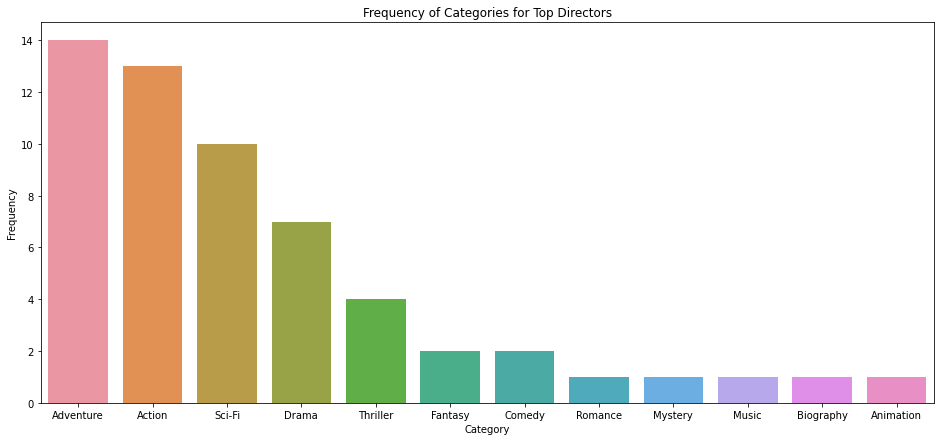

In [21]:
fig = plt.subplots(figsize = (16,7))
seaborn.barplot(data=cat_freq, x="Category" , y= "Frequency")

plt.title("Frequency of Categories for Top Directors")

plt.show()


*We filtered and sorted the data from the im.db database to extract various queries. We would recommend the client select a director such as one of the 20 we showed in the graph above due to their history of highly rated movies with a high number of votes in the category of either Adventure, Action , or Sci-Fi showing that it is popular amongst the population.*

***
#  📈 Statistical insights📈
***

![gifp](https://media.giphy.com/media/dHn4QSRITpHtLxpgdv/giphy.gif)

Our first query is for the poblation, so we do not want null values, lets exclude them. In reference to the previous ERD we could know what table join and what is the key

In [22]:
prueba= pd.read_sql("""
SELECT 
    mb.runtime_minutes, mr.numvotes, 
    mr.averagerating,  mb.original_title, mb.genres
  FROM 
      movie_basics mb
  JOIN 
      movie_ratings mr USING(movie_id) 
  WHERE 
      mb.runtime_minutes AND mb.genres IS NOT Null 
  ;
""", conn)
#prueba.info()

Ok, now we are sure we have no null values in the columns of our interest, also we can confirm by putting 
`prueba.info()` because it load as a dataframe, but maybe we have outlier, so in order to check that we can see the sactter between the `numvotes` and `runtime`

Text(0, 0.5, 'Number of votes')

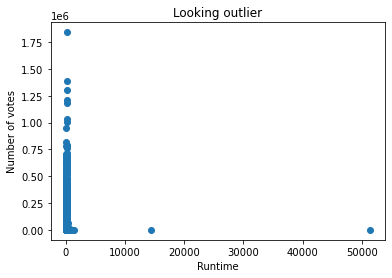

In [23]:
#In order to see the correlation we need the columns of runtime and votes as lists, so let's assing each to a new variables
prueba_run=list(prueba["runtime_minutes"])
prueba_numv=list(prueba["numvotes"])


fig, ax = plt.subplots()
#We use the method scatter
ax.scatter(prueba_run, prueba_numv)

#Setting labels and title
ax.set_title("Looking outlier")
ax.set_xlabel("Runtime")
ax.set_ylabel("Number of votes")

We can see there is outliers in our data in runtime as well as in Number of votes, according to `prueba.info()`we have 65720 rows, so we actually do not need this data, let's exclude them in our query, in the chart below we can have and idea of this limits.

## Poblation

In [24]:
poblation= pd.read_sql("""
SELECT 
    mb.runtime_minutes, mr.numvotes, 
    mr.averagerating,  mb.original_title, mb.genres
  FROM 
      movie_basics mb
  JOIN 
      movie_ratings mr USING(movie_id) 
  WHERE 
      mb.runtime_minutes AND mb.genres IS NOT Null
  AND 
      mr.numvotes < 948394
  AND 
      mb.runtime_minutes < 600
  ORDER 
      BY mr.numvotes DESC
  ;""", conn)

Let's confirm we do not have outliers anymore

Text(0, 0.5, 'Number of votes')

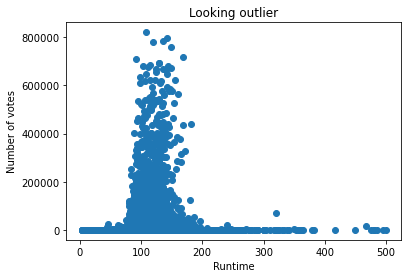

In [25]:
sc_p_run=list(poblation["runtime_minutes"])
sc_p_nv=list(poblation["numvotes"])


fig, ax = plt.subplots()
#We use the method scatter
ax.scatter(sc_p_run, sc_p_nv)

#Setting labels and title
ax.set_title("Looking outlier")
ax.set_xlabel("Runtime")
ax.set_ylabel("Number of votes")

Ok, this data is cotinuos now :D, let's set our sample:
## Sample
For this query we want to set the proposed interval of time 90-130 minutes

In [26]:
condition= pd.read_sql("""
SELECT 
    mb.runtime_minutes, 
    mr.numvotes, mr.averagerating
FROM
    movie_basics mb
JOIN 
    movie_ratings mr USING(movie_id) 
WHERE 
    mb.runtime_minutes 
AND 
    mb.genres IS NOT Null 
AND 
    mb.runtime_minutes < 130 
AND
    mb.runtime_minutes > 90
AND 
    mr.numvotes < 948394
ORDER BY 
    mb.runtime_minutes DESC
  ;
""", conn)

But this is not our actual sample because in order to be a sample we need to choose random data from `condition`

In [27]:
sample1=condition.sample(650)

In [28]:
sample_1=sample1.copy()

Ok, now let's set our hypothesis:
* **$H_a$** :	The mean of the number of votes when a movie has a runtime 	between 90 and 130 is significantly bigger than the mean of all the 	movies in our dataset.
* **$H_0$** :	There is no significantly difference between the sample mean and 	the poblation mean.
* **$\alpha$** = 0.05.

## Z-score
We can know the mean and standard desviation of our poblation and sample, let's get them

In [29]:
#In advance we can see the basics for our sample and poblation
poblation.describe(), sample_1.describe()

(       runtime_minutes       numvotes  averagerating
 count     65702.000000   65702.000000   65702.000000
 mean         93.635064    3804.866427       6.320407
 std          23.713557   28903.896286       1.458682
 min           3.000000       5.000000       1.000000
 25%          81.000000      16.000000       5.500000
 50%          91.000000      62.000000       6.500000
 75%         104.000000     352.000000       7.300000
 max         500.000000  820847.000000      10.000000,
        runtime_minutes       numvotes  averagerating
 count       650.000000     650.000000     650.000000
 mean        103.107692    6165.038462       6.322000
 std           9.923316   34433.896394       1.275993
 min          91.000000       5.000000       1.700000
 25%          95.000000      26.000000       5.500000
 50%         100.000000     114.000000       6.400000
 75%         110.000000     738.000000       7.200000
 max         129.000000  452036.000000       9.600000)

In [30]:
#For the pupulation
p_mean=poblation["numvotes"].mean()
p_std=poblation["numvotes"].std()

#For the sample
s_mean=sample_1["numvotes"].mean()
s_std=sample_1["numvotes"].std()

#Z equation
z = (s_mean - p_mean)/(p_std/np.sqrt(650))

#P-value:
#Positive z
p_value=1 - stats.norm.cdf(z)

#Negative z
#p_value=1 - stats.norm.cdf(z)

print("Z is equal to: " + str(z) + "\n And p-value: " +str(p_value) )

Z is equal to: 2.0818236993844654
 And p-value: 0.018679288093761737


With this P-value we was able to reject the Null Hypothesis and we can conclude if the movie has a runtime between 90 and 130 minutes will get bigger number of votes.